# 主要目標:
    
了解各種Seaborn 的圖示化套件如何使用
    
https://zhuanlan.zhihu.com/p/27971446

https://zhuanlan.zhihu.com/p/73472091
    
    
可視化統計關係<br>
統計分析是一個了解數據集中變數之間如何相互關聯以及這些關係如何依賴於其他變數的過程。<br>
可視化可能是此過程的核心元件,因為當數據正確可視化時,人類可視化系統可以看到指示關係的趨勢和模式。

將變數與散點圖關聯<br>
散點圖是統計可視化的支柱。它使用點雲描繪了兩個變數的聯合分佈,其中每個點表示數據集中的觀測值。<br>
這種描述允許眼睛推斷出大量有關它們之間是否有任何有意義的關係的資訊。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Seaborn圖樣式**

有五種預設seaborn主題：darkgrid，whitegrid，dark，white，和ticks。

它們各自適合不同的應用和個人喜好。

darkgrid 黑色網格（默認）<br>
whitegrid 白色網格<br>
dark 黑色背景<br>
white 白色背景<br>
ticks 加上刻度的白色背景

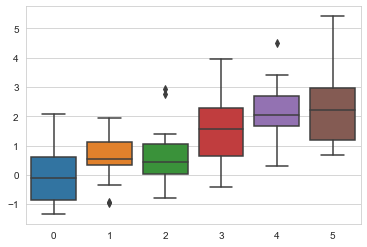

In [4]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

小提琴圖（Violin Plot）: `sns.violinplot()`

https://waynestalk.com/python-box-violin-plot/

邊框控制 : `despine（）`

去除上方和右方坐標軸邊框

offset : 兩坐標軸離開距離

**一些情節受益於將尖刺偏離數據，這也可以在呼叫時完成`despine()`。**

**當刻度不覆蓋整個軸範圍時，該trim參數將限制倖存脊柱的範圍**

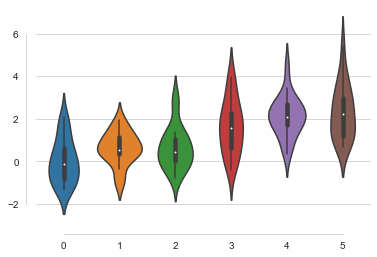

In [5]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

**使用其他參數控制刪除哪些刺 `despine()`**

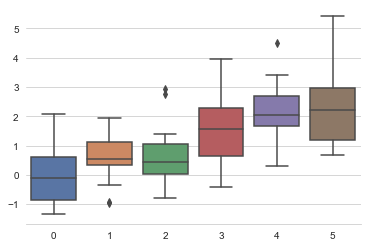

In [6]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

**暫時設定圖形樣式**

雖然來回切換很容易，但也可以`axes_style()`在with語句中使用該功能來**臨時設置繪圖參數。**

這也允許使用不同風格的軸製作圖形

In [7]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

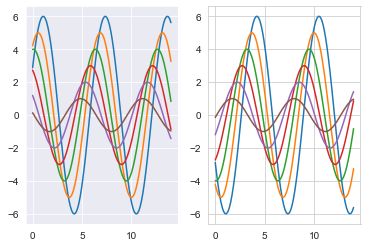

In [8]:
f = plt.figure()
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

可視化統計關係<br>
統計分析是一個了解數據集中變數之間如何相互關聯以及這些關係如何依賴於其他變數的過程。<br>
可視化可能是此過程的核心元件,因為當數據正確可視化時,人類可視化系統可以看到指示關係的趨勢和模式。

將變數與散點圖關聯<br>
散點圖是統計可視化的支柱。它使用點雲描繪了兩個變數的聯合分佈,其中每個點表示數據集中的觀測值。<br>
這種描述允許眼睛推斷出大量有關它們之間是否有任何有意義的關係的資訊。

In [10]:
sns.set(style="ticks")
tips = sns.load_dataset("tips")

**散點圖關聯變量**

散點圖 : `sns.relplot()`

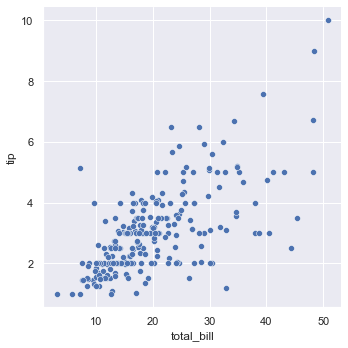

In [12]:
# 散點圖關聯變量
sns.set(style="darkgrid")
sns.relplot(x="total_bill", y="tip", data=tips);

當點以兩個維度繪製時,可以通過根據第三個變數對點進行著色,將另一個維度添加到繪圖中。這稱為使用「色調語義」,因為點的顏色獲得意義

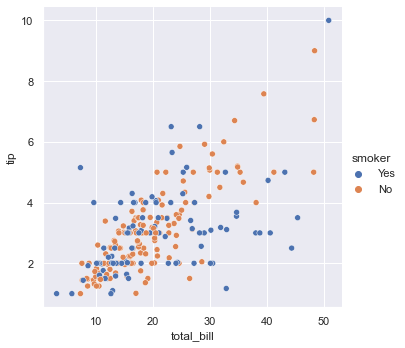

In [14]:
#當點以兩個維度繪製時,可以通過根據第三個變數對點進行著色,將另一個維度添加到繪圖中。這稱為使用「色調語義」,因為點的顏色獲得意義:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

通過獨立地改變每個點的色調和样式，也可以表示四個變量

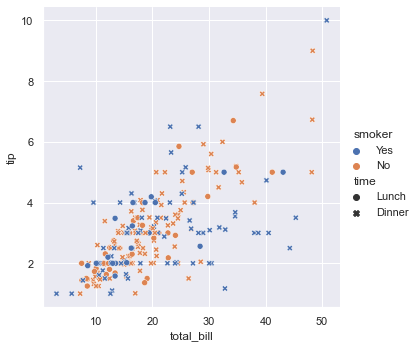

In [15]:
#通過獨立地改變每個點的色調和样式，也可以表示四個變量
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [17]:
tips = sns.load_dataset("tips")
fmri = sns.load_dataset("fmri")

**聚合和表示不確定性 --**

**更複雜的數據集將具有變數相同值的多個度量。**

**Seaborn 中的預設行為是透過繪製平均值和 95% 信心區間圍繞平均值來聚合每個值的多個測量值:xx**

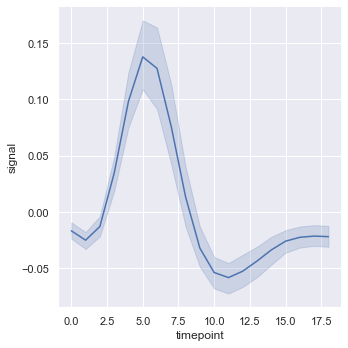

In [18]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

**信心區間是使用引導計算的,對於較大的數據集,這需要時間。因此,可以禁用它們:**

`ci=None`

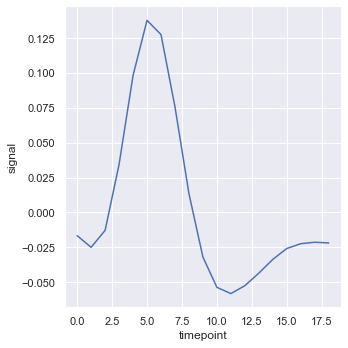

In [19]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

**另一個不錯的選擇(尤其是對於較大的數據)是通過繪製標準差而不是信心區間來表示每個時間點的分佈分佈:**

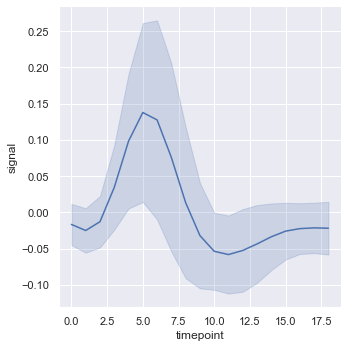

In [22]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

使用語義映射繪製數據子集。<br>
`lineplot()`具有與`scatterplot()`相同的靈活性:它可以通過修改繪圖元素的色調、大小和樣式來顯示最多三個附加變數。<br>

在lineplot()中使用語義也將確定數據的聚合方法。例如,添加具有兩個級別的色調語義將繪圖拆分為兩行和誤差帶,對每行進行著色,以指示它們對應的數據子集。

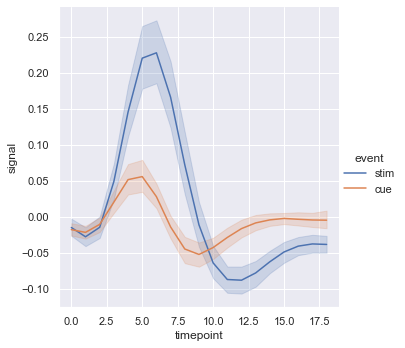

In [23]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

**預設情況下,向線條圖添加樣式語義會更改行中的破折號模式**

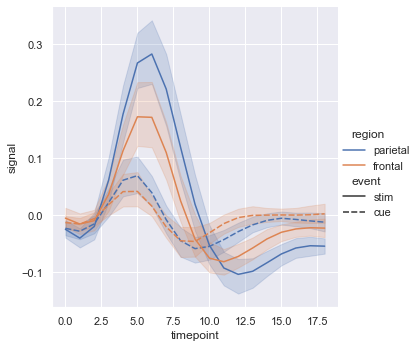

In [24]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

**可視化數據分布**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

**繪製單變數分佈:** 
    
快速檢視海出生單變數分佈的最便捷方式是`distplot()` 函數。默認情況下,這將繪製直方圖並適合內核密度估計值(KDE)。

D:\Anaconda3\envs\PT\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


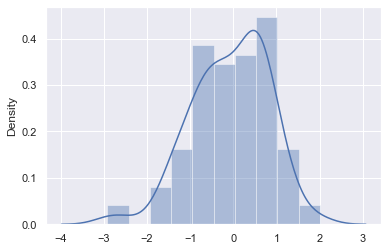

In [27]:
x = np.random.normal(size=100)
sns.distplot(x);

繪製直方圖時,主要選擇是要使用的條柱數和放置位置。 

distplot()使用簡單的規則來正確猜測預設情況下正確的數位,但嘗試更多或更少的 bin 可能會顯示資料中的其他特徵:

bin: 指的是特徵值, 先取消KDE 避免混淆

`sns.distplot()`<br> 
bin: 指的是特徵值<br> 
kde: on/off<br> 

D:\Anaconda3\envs\PT\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\envs\PT\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


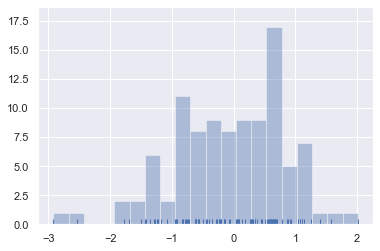

In [28]:
# bin: 指的是特徵值, 先取消KDE 避免混淆
sns.distplot(x, bins=20, kde=False, rug=True);